### Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.

Ans)Ordinal Encoding and Label Encoding are both techniques used to convert categorical data into numerical form, but they differ in their application and suitability for different types of categorical variables.
  
#### Ordinal Encoding:  
1.Ordinal Encoding is used when the categorical variable has an inherent order or ranking among its categories.   
2.It assigns numerical values to the categories based on their order, preserving the ordinal relationship.    
3.Typically, the categories are mapped to integer values starting from 0 to N-1, where N is the number of unique categories.   
4.Ordinal Encoding is suitable for ordinal data, where the categories have a meaningful ranking.  

Example: If we have a categorical variable representing education level with categories "High School," "Bachelor's," "Master's," and "Ph.D.," we can use ordinal encoding to map them to 0, 1, 2, and 3, respectively.  

#### Label Encoding:  
1.Label Encoding is used when the categorical variable is nominal, meaning there is no inherent order or ranking among the categories.    
2.It assigns unique numerical labels to each category, effectively creating a nominal-to-numeric mapping.  
3.Label Encoding does not preserve any ordinal relationship among the categories.   
4.It is suitable for nominal data, where the categories do not have any meaningful ranking.  

Example: If we have a categorical variable representing colors with categories "Red," "Blue," and "Green," we can use label encoding to map them to 0, 1, and 2, respectively.

When there is a rank to be assigned to the data like levels of eductaion background,contract type we use ordinal encoding if the data is of no specific rank like the colors,types of furniture,shapes and so on.

### Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.

**Target Guided Ordinal Encoding** is a technique used to encode categorical variables by creating ordinal labels based on the target variable. It is particularly useful when the target variable is binary (e.g., 0 or 1) or ordinal (e.g., low, medium, high). The main idea behind Target Guided Ordinal Encoding is to encode the categorical variable in such a way that the encoding reflects the relationship between the categorical variable and the target variable, thereby capturing useful information for predictive modeling.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

1.Calculate Mean/Median/Other Aggregate of the Target Variable for Each Category : For each unique category in the categorical variable, calculate the mean, median, or another appropriate aggregate of the target variable. This step involves creating a mapping of each category to the corresponding mean/median/aggregate of the target variable.

2.Ordering the Category based on the Aggregate Values : Order the categories based on the calculated mean/median/aggregate value. The idea is to assign higher values to categories that have a higher correlation with the target variable and vice versa.

3.Encode the Categories: Assign ordinal labels to the categories based on their order. The category with the highest aggregate value gets the highest label, and the one with the lowest aggregate value gets the lowest label.

In [25]:
#For Example

import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

df.head()

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180


In [26]:
mean_values = df.groupby('city')['price'].mean().to_dict()
mean_values

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [27]:
df['city_encoded'] = df['city'].map(mean_values)

In [28]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


Here we had a data based on city and cost of living of different people . We had to convert the City Categorical Column to Numerical so the best possible method to covert this data is by using Target Guided Ordinal Encoding.

### Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

**Covariance** is a statistical measure that quantifies the degree to which two variables change together. It indicates the direction of the relationship between two variables and whether they tend to increase or decrease simultaneously. A positive covariance suggests that the variables tend to increase or decrease together, while a negative covariance suggests that as one variable increases, the other decreases.

Importance of Covariance in Statistical Analysis:

1.Relationship Assessment: Covariance helps in understanding the relationship between two variables. If the covariance is positive, it indicates a positive correlation, suggesting that the variables move in the same direction. If it is negative, it indicates a negative correlation, suggesting that the variables move in opposite directions.

2.Data Understanding: Covariance provides insights into the direction and strength of association between variables, which is crucial for understanding the underlying patterns in the data.

3.Portfolio Diversification: In finance, covariance is used to analyze the risk and return of portfolios. Covariance between the returns of different assets helps investors diversify their portfolio to manage risk effectively.

4.Modeling: Covariance is a fundamental component in various statistical models and machine learning algorithms, such as linear regression, principal component analysis (PCA), and factor analysis.


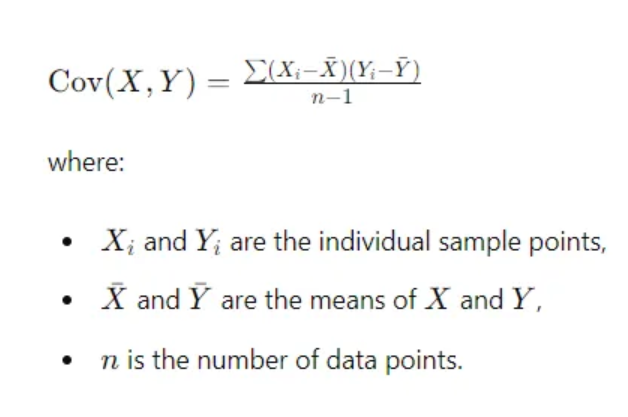



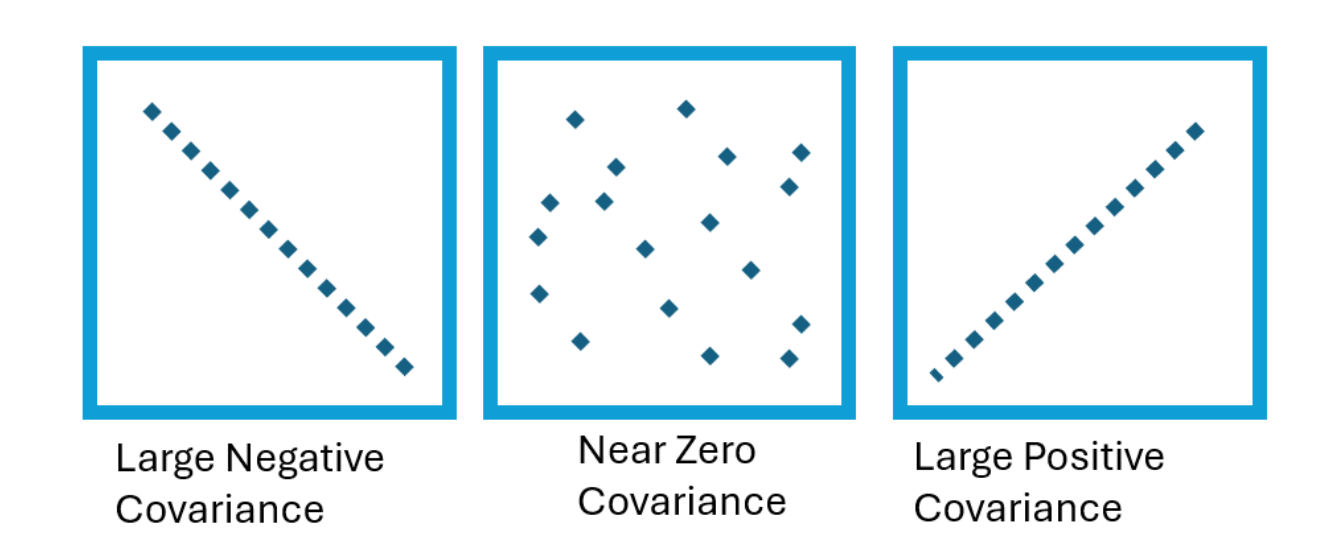

In [29]:
import pandas as pd

# Sample data
data = {
    'Hours_Studied': [2, 4, 6, 8, 10],
    'Test_Score': [50, 55, 65, 70, 85]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate covariance
cov_matrix = df.cov()

print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
                Hours_Studied  Test_Score
Hours_Studied           10.0        42.5
Test_Score              42.5       187.5


In [30]:
cov_value = df['Hours_Studied'].cov(df['Test_Score'])
print("Covariance between Hours_Studied and Test_Score:", cov_value)

Covariance between Hours_Studied and Test_Score: 42.5


### Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'Color': ['red', 'green', 'blue', 'green', 'red'],
    'Size': ['small', 'medium', 'large', 'medium', 'small'],
    'Material': ['wood', 'metal', 'plastic', 'wood', 'metal']
}

df = pd.DataFrame(data)

# Initialize LabelEncoder
le_color = LabelEncoder()
le_size = LabelEncoder()
le_material = LabelEncoder()

# Apply label encoding
df['Color_encoded'] = le_color.fit_transform(df['Color'])
df['Size_encoded'] = le_size.fit_transform(df['Size'])
df['Material_encoded'] = le_material.fit_transform(df['Material'])

print(df)

   Color    Size Material  Color_encoded  Size_encoded  Material_encoded
0    red   small     wood              2             2                 2
1  green  medium    metal              1             1                 0
2   blue   large  plastic              0             0                 1
3  green  medium     wood              1             1                 2
4    red   small    metal              2             2                 0


The original categorical values (Color, Size, Material) are replaced with numeric codes using LabelEncoder.These encoded columns (*_encoded) make the data suitable for machine learning models, which require numerical input.

### Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.

In [32]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'Age': [25, 32, 47, 54, 23],
    'Income': [40000, 52000, 75000, 91000, 39000],
    'Education_Level': [12, 14, 16, 18, 12]  # Years of education
}

df = pd.DataFrame(data)

# Calculate covariance matrix
cov_matrix = df.cov()
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
                      Age       Income  Education_Level
Age                 187.7     312150.0             35.4
Income           312150.0  522300000.0          59300.0
Education_Level      35.4      59300.0              6.8


### Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?

**Gender (Binary Categorical Variable: Male/Female):** Since "Gender" is a binary categorical variable with only two possible values (Male and Female), the preferred encoding method is Label Encoding. In label encoding, we can assign 0 to one category (e.g., Male) and 1 to the other category (e.g., Female). Label encoding is suitable for binary categorical variables as it allows us to represent the categories as numerical values, which is useful for various machine learning algorithms.

**Education Level (Ordinal Categorical Variable:** High School/Bachelor's/Master's/PhD): "Education Level" is an ordinal categorical variable with a clear ordering of categories. In this case, the recommended encoding method is Ordinal Encoding. Ordinal encoding assigns a unique integer value to each category based on its order. For example, we can encode High School as 0, Bachelor's as 1, Master's as 2, and PhD as 3. By using ordinal encoding, we preserve the ordinal relationship between the categories, which is important when certain categories have a natural order.

**Employment Status (Nominal Categorical Variable:** Unemployed/Part-Time/Full-Time): "Employment Status" is a nominal categorical variable with no inherent order among its categories. For nominal categorical variables, the preferred encoding method is One-Hot Encoding. One-hot encoding creates binary columns for each category, where a value of 1 represents the presence of the category, and 0 represents its absence. For example, we can create three columns (Unemployed, Part-Time, Full-Time) where the corresponding category is encoded as 1 and the others as 0. One-hot encoding is useful for preventing any ordinality between categories, as they are treated as distinct and independent.

1.Nominal for Gender as they are binary category variables   
2.Ordinal for Education Level as they are ordinal category variables    
3.One hot Encoding for Employment Status as they are nominal category variables   

### Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/ East/West). Calculate the covariance between each pair of variables and interpret the results.

In [33]:
import pandas as pd


df = pd.DataFrame({
    'Temperature': [25, 20, 30, 22, 28],
    'Humidity': [60, 70, 55, 75, 65],
    'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy'],
    'Wind Direction': ['North', 'South', 'East', 'West', 'North']
})

df

,Temperature,Humidity,Weather Condition,Wind Direction
0,25,60,Sunny,North
1,20,70,Cloudy,South
2,30,55,Rainy,East
3,22,75,Sunny,West
4,28,65,Cloudy,North


In [34]:
#Converting Categorial Variables to Numerical as coariance only works on numerical data
#Using OHE for Weather Condition & Wind Direction as they are Binary Variables

from sklearn.preprocessing import OneHotEncoder

encodeee= OneHotEncoder()
values = encodeee.fit_transform(df[['Weather Condition','Wind Direction']]).toarray()

In [35]:
encoded_df = pd.DataFrame(values,columns=encodeee.get_feature_names())
df = pd.concat([df,encoded_df],axis =1)
df.drop(columns=['Weather Condition','Wind Direction'],inplace = True)
df

,Temperature,Humidity,x0_Cloudy,x0_Rainy,x0_Sunny,x1_East,x1_North,x1_South,x1_West
0,25,60,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,20,70,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,55,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,22,75,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,65,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
print("Covariance Matrix : ")
df.cov()

Covariance Matrix : 


,Temperature,Humidity,x0_Cloudy,x0_Rainy,x0_Sunny,x1_East,x1_North,x1_South,x1_West
Temperature,17.00,-26.25,-0.50,1.25,-0.75,1.25,0.75,-1.25,-0.75
Humidity,-26.25,62.50,1.25,-2.50,1.25,-2.50,-1.25,1.25,2.50
x0_Cloudy,-0.50,1.25,0.30,-0.10,-0.20,-0.10,0.05,0.15,-0.10
x0_Rainy,1.25,-2.50,-0.10,0.20,-0.10,0.20,-0.10,-0.05,-0.05
x0_Sunny,-0.75,1.25,-0.20,-0.10,0.30,-0.10,0.05,-0.10,0.15
x1_East,1.25,-2.50,-0.10,0.20,-0.10,0.20,-0.10,-0.05,-0.05
x1_North,0.75,-1.25,0.05,-0.10,0.05,-0.10,0.30,-0.10,-0.10
x1_South,-1.25,1.25,0.15,-0.05,-0.10,-0.05,-0.10,0.20,-0.05
x1_West,-0.75,2.50,-0.10,-0.05,0.15,-0.05,-0.10,-0.05,0.20
